# 센서 데이터 활용 장비 이상진단 및 예측(Sensor data analysis)

## 문제 상황  

A공장에서는 최근 도입한 장비로 인하여 골치를 썩고 있다. 새로 도입한 장비의 지속적인 고장으로 인하여 생산 스케줄이 지연되고  
있기 때문이다. 해당 장비의 특성상 한 번 고장이 나면 라인 전체를 Stop 시켜야 하므로 공정 Process에서 Bottleneck 구간이다.  
고장이 나면 공정상 막대한 손해이기 때문에 고장이 나기 전 사전 이상징후를 포착하고 점검을 통해 고장이 발생하여 미치는
손실을 줄이고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 설비 고장으로 인한 Line stop, 생산 스케줄 지연, 매출감소, 영업이익 감소

2. 기대효과

- 사전 이상징후 감지 및 점검을 통해 고장으로 인한 Line stop 감소, 생산 스케줄 정상화

3. 해결방안

- 데이터 기반으로 이상징후를 정의하고, 센서 데이터 모니터링을 통해 이상징후 포착 및 실시간 점검 

4. 성과측정

- 이상징후 모니터링 전/후 제품 생산량, Line stop 횟수 비교

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_features = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/센서 데이터 활용 장비 이상진단 및 예측/센서 데이터 활용 장비 이상진단 및 예측_features.csv')
df_target = pd.read_csv('C:/Users/USER/Desktop/Practice Project - ML/센서 데이터 활용 장비 이상진단 및 예측/센서 데이터 활용 장비 이상진단 및 예측_target.csv')

In [2]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1050000 non-null  int64  
 1   Time    1050000 non-null  float64
 2   S1      1050000 non-null  float64
 3   S2      1050000 non-null  float64
 4   S3      1050000 non-null  float64
 5   S4      1050000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.1 MB


In [3]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2800 non-null   int64  
 1   X       2800 non-null   float64
 2   Y       2800 non-null   float64
 3   M       2800 non-null   float64
 4   V       2800 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 109.5 KB


In [4]:
print(df_features.isnull().sum())
print('')
print(df_target.isnull().sum())

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64

id    0
X     0
Y     0
M     0
V     0
dtype: int64


#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에서 결측치가 존재하지 않는다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- float64형태 9개, int64형태 2개로 구성되어 있다. 

3. 컬럼 설명

- id : 제품
- Time : 시간
- S1 : 충돌 센서1
- S2 : 충돌 센서2
- S3 : 충돌 센서3
- S4 : 충돌 센서4  

    
- id : 제품
- X : X 좌표
- Y : Y 좌표
- M : 질량
- V : 속도

In [7]:
df_features.describe()

,id,Time,S1,S2,S3,S4
count,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06
mean,1.399500e+03,7.480000e-04,-4.050983e+02,-4.050983e+02,-1.334343e+03,-1.605664e+03
std,8.082907e+02,4.330114e-04,2.753174e+05,2.753174e+05,2.655351e+05,3.026970e+05
min,0.000000e+00,0.000000e+00,-5.596468e+06,-5.596468e+06,-2.772952e+06,-6.069645e+06
25%,6.997500e+02,3.720000e-04,-7.426321e+04,-7.426321e+04,-7.855488e+04,-7.818371e+04
50%,1.399500e+03,7.480000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.099250e+03,1.124000e-03,7.391142e+04,7.391142e+04,7.295836e+04,7.665808e+04
max,2.799000e+03,1.496000e-03,3.865086e+06,3.865086e+06,3.655237e+06,3.687344e+06


In [8]:
df_target.describe()

,id,X,Y,M,V
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,0.000000,-5.000000,100.000000,0.600000
std,808.434702,259.854028,255.926537,50.008931,0.282893
min,0.000000,-400.000000,-400.000000,25.000000,0.200000
25%,699.750000,-200.000000,-200.000000,50.000000,0.400000
50%,1399.500000,0.000000,0.000000,100.000000,0.600000
75%,2099.250000,200.000000,200.000000,150.000000,0.800000
max,2799.000000,400.000000,400.000000,175.000000,1.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [10]:
outlier1 = pd.melt(df_features, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier1

,이상치 탐색 변수,이상치 탐색 값
0,id,0.00
1,id,0.00
2,id,0.00
3,id,0.00
4,id,0.00
...,...,...
6299995,S4,-147910.20
6299996,S4,-111591.10
6299997,S4,-86836.78
6299998,S4,-75660.00


In [11]:
outlier2 = pd.melt(df_target, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier2

,이상치 탐색 변수,이상치 탐색 값
0,id,0.0
1,id,1.0
2,id,2.0
3,id,3.0
4,id,4.0
...,...,...
13995,V,1.0
13996,V,0.2
13997,V,0.2
13998,V,0.6


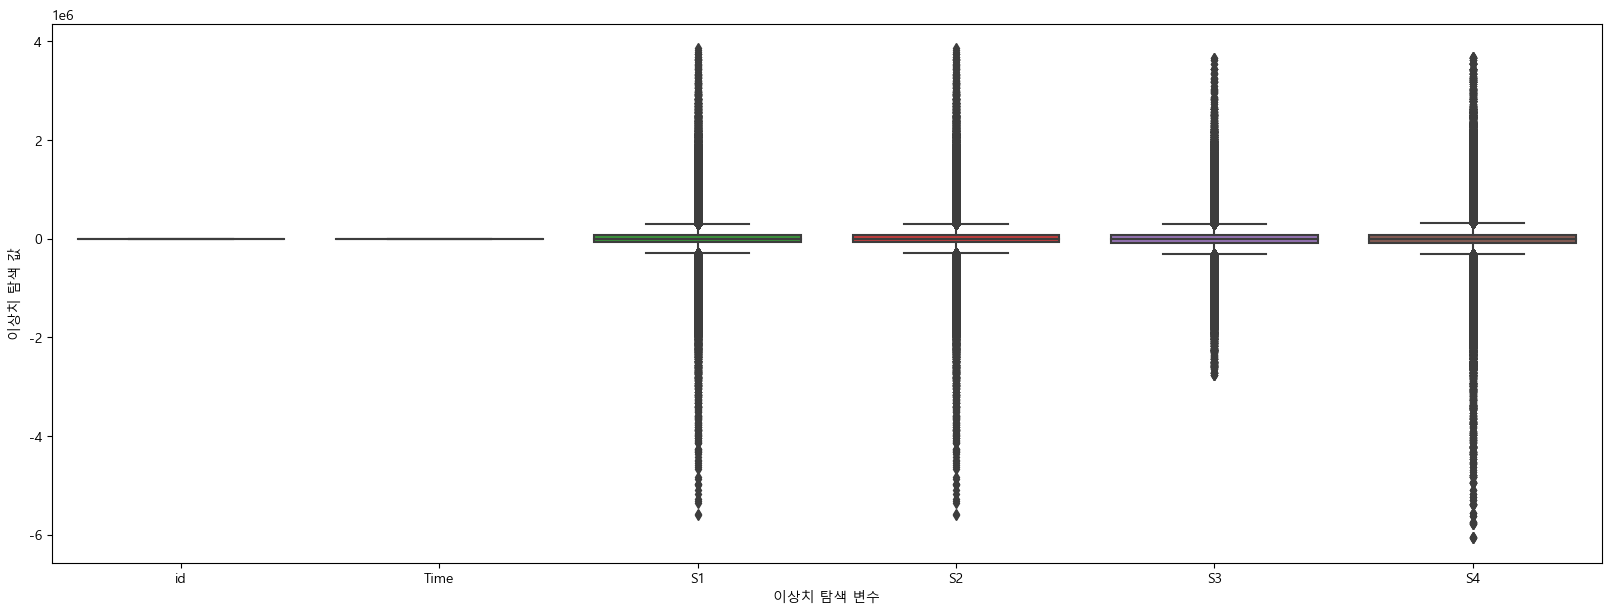

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20,7))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier1)
plt.xticks(range(6), df_features.columns)
plt.show()

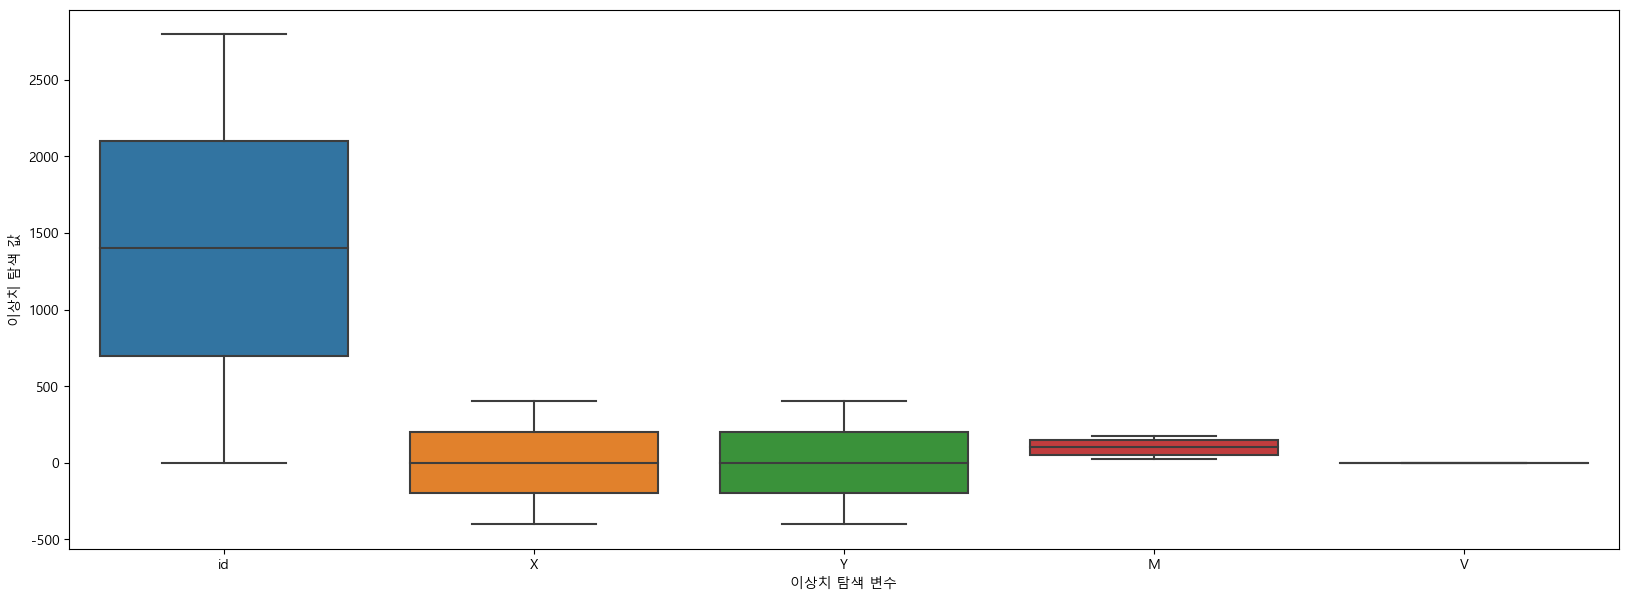

In [13]:
plt.figure(figsize = (20,7))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier2)
plt.xticks(range(5), df_target.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다.(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [14]:
print('df_features_unique_id :', len(df_features['id'].unique()))
print('df_target_unique_id :', len(df_target['id'].unique()))

df_features_unique_id : 2800
df_target_unique_id : 2800


Unique한 id 개수가 동일한 것으로 보아, Feature data가 id당 다수의 데이터를 가지고 있는 것으로 추정된다

In [15]:
df_features[df_features['id']==0].head(5)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


하나의 id(제품)당 0.000004초의 간격으로 센서 S1~S4에 값이 수집되고 있는 상황임을 알 수 있다

In [16]:
df_features_proc = df_features.groupby('id').mean()

In [17]:
df_features.groupby('id').mean()

,Time,S1,S2,S3,S4
id,,,,,
0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893
1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221
2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340
3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867
4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287
...,...,...,...,...,...
2795,0.000748,5600.614397,5885.824925,-6380.192826,-7357.437798
2796,0.000748,-1215.328099,2702.879683,805.983784,-2876.150150
2797,0.000748,436.239993,276.327514,951.805606,-903.193922


Target data set과 차원을 맞춰주기 위해 id 별로 Sensor 값의 평균을 사용한다

In [18]:
print('df_features', df_features_proc.shape)
print('df_target', df_target.shape)

df_features (2800, 5)
df_target (2800, 5)


In [20]:
df_merge = pd.merge(df_features_proc, df_target, on='id', how='left')
df_merge.head(5)

,id,Time,S1,S2,S3,S4,X,Y,M,V
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893,0.0,-400.0,50.0,0.4
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221,400.0,0.0,100.0,1.0
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340,-300.0,-200.0,25.0,0.4
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867,200.0,-100.0,150.0,0.4
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287,-300.0,-100.0,150.0,0.4


In [21]:
df_merge=df_merge.drop(['Time', 'X', 'Y'], axis=1)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4


이상진단에 있어서 시간과 좌표값은 필요없으므로 제거해준다

In [22]:
df_merge['MV'] = df_merge['M'] * df_merge['V']
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0


M(질량) * V(속도) = 최종 충돌 에너지로 정의하고, 새로운 컬럼을 생성한다

충돌에너지 평균 : 60.0


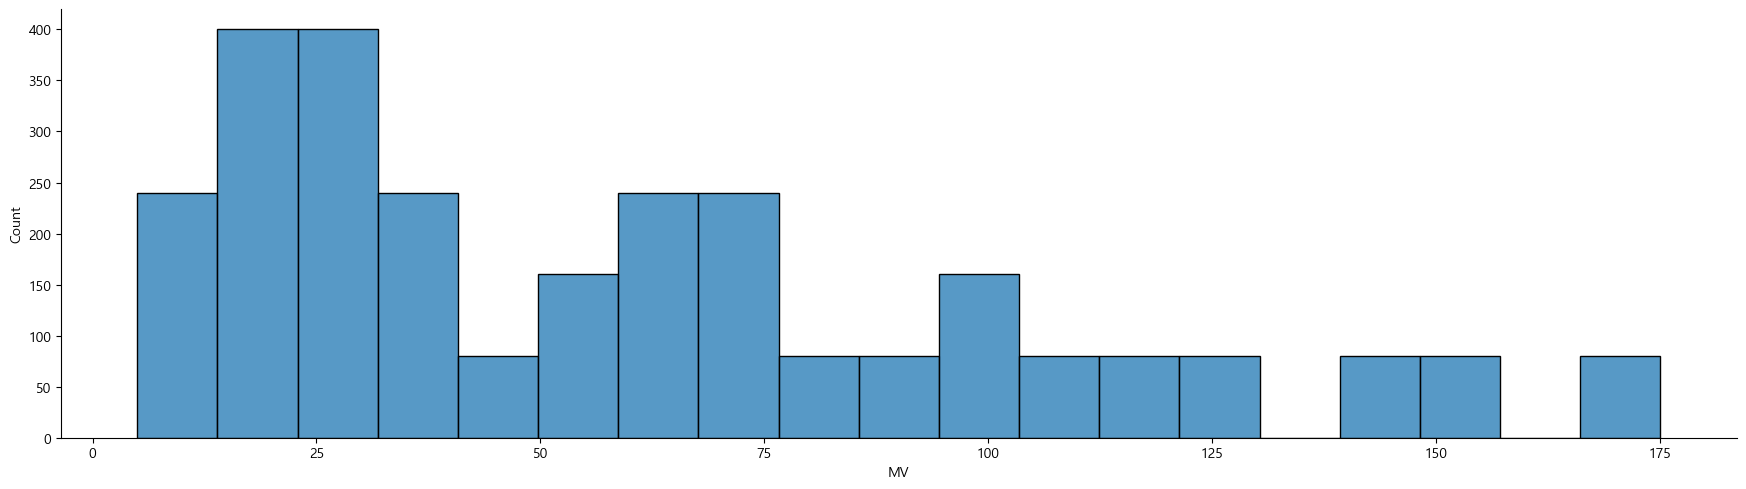

In [23]:
sns.displot(df_merge['MV']);
plt.gcf().set_size_inches(20, 5)
print("충돌에너지 평균 :", df_merge['MV'].mean())

이상(abnormal)을 정의하기 위해 MV(충돌 에너지)의 분포를 확인한 결과, 대다수의 충돌에너지 data가 충돌에너지의 평균인 60 근처에 분포한 것을 알 수 있다

In [24]:
import numpy as np
df_merge['abnormal'] =  np.where(df_merge['MV'] > df_merge['MV'].mean() + 2*df_merge['MV'].std(), 1, 0)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0


보통 현업의 기준이 존재하지 않는다면, data의 평균에서 ±1, ±2, ±3 std(표준편차) 떨어진 data들을 이상으로 가정하는 경우가 많다. 해당 분석에서는 mean + 2std 이상인 충돌 에너지를 이상으로 정의한다

In [25]:
df_merge['abnormal'].value_counts()

0    2640
1     160
Name: abnormal, dtype: int64

In [29]:
print("실제 평균 이상률 : ", ((160/2640) * 100))

실제 평균 이상률 :  6.0606060606060606


## Rule base 이상진단

In [27]:
print("abnormal :",df_merge[df_merge['abnormal']==1]['S1'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S1'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S2'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S2'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S3'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S3'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S4'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S4'].mean())

abnormal : -910.6725618222312 / normal :  -374.45745921838835
abnormal : -910.672561822231 / normal :  -374.4574593173885
abnormal : -3662.427652993807 / normal :  -1193.2474540432381
abnormal : -4473.323652485666 / normal :  -1431.8663172477707


이상(abnormal)과 정상(normal)일 때, 센서 값의 평균 값이 다른 것을 확인할 수 있다

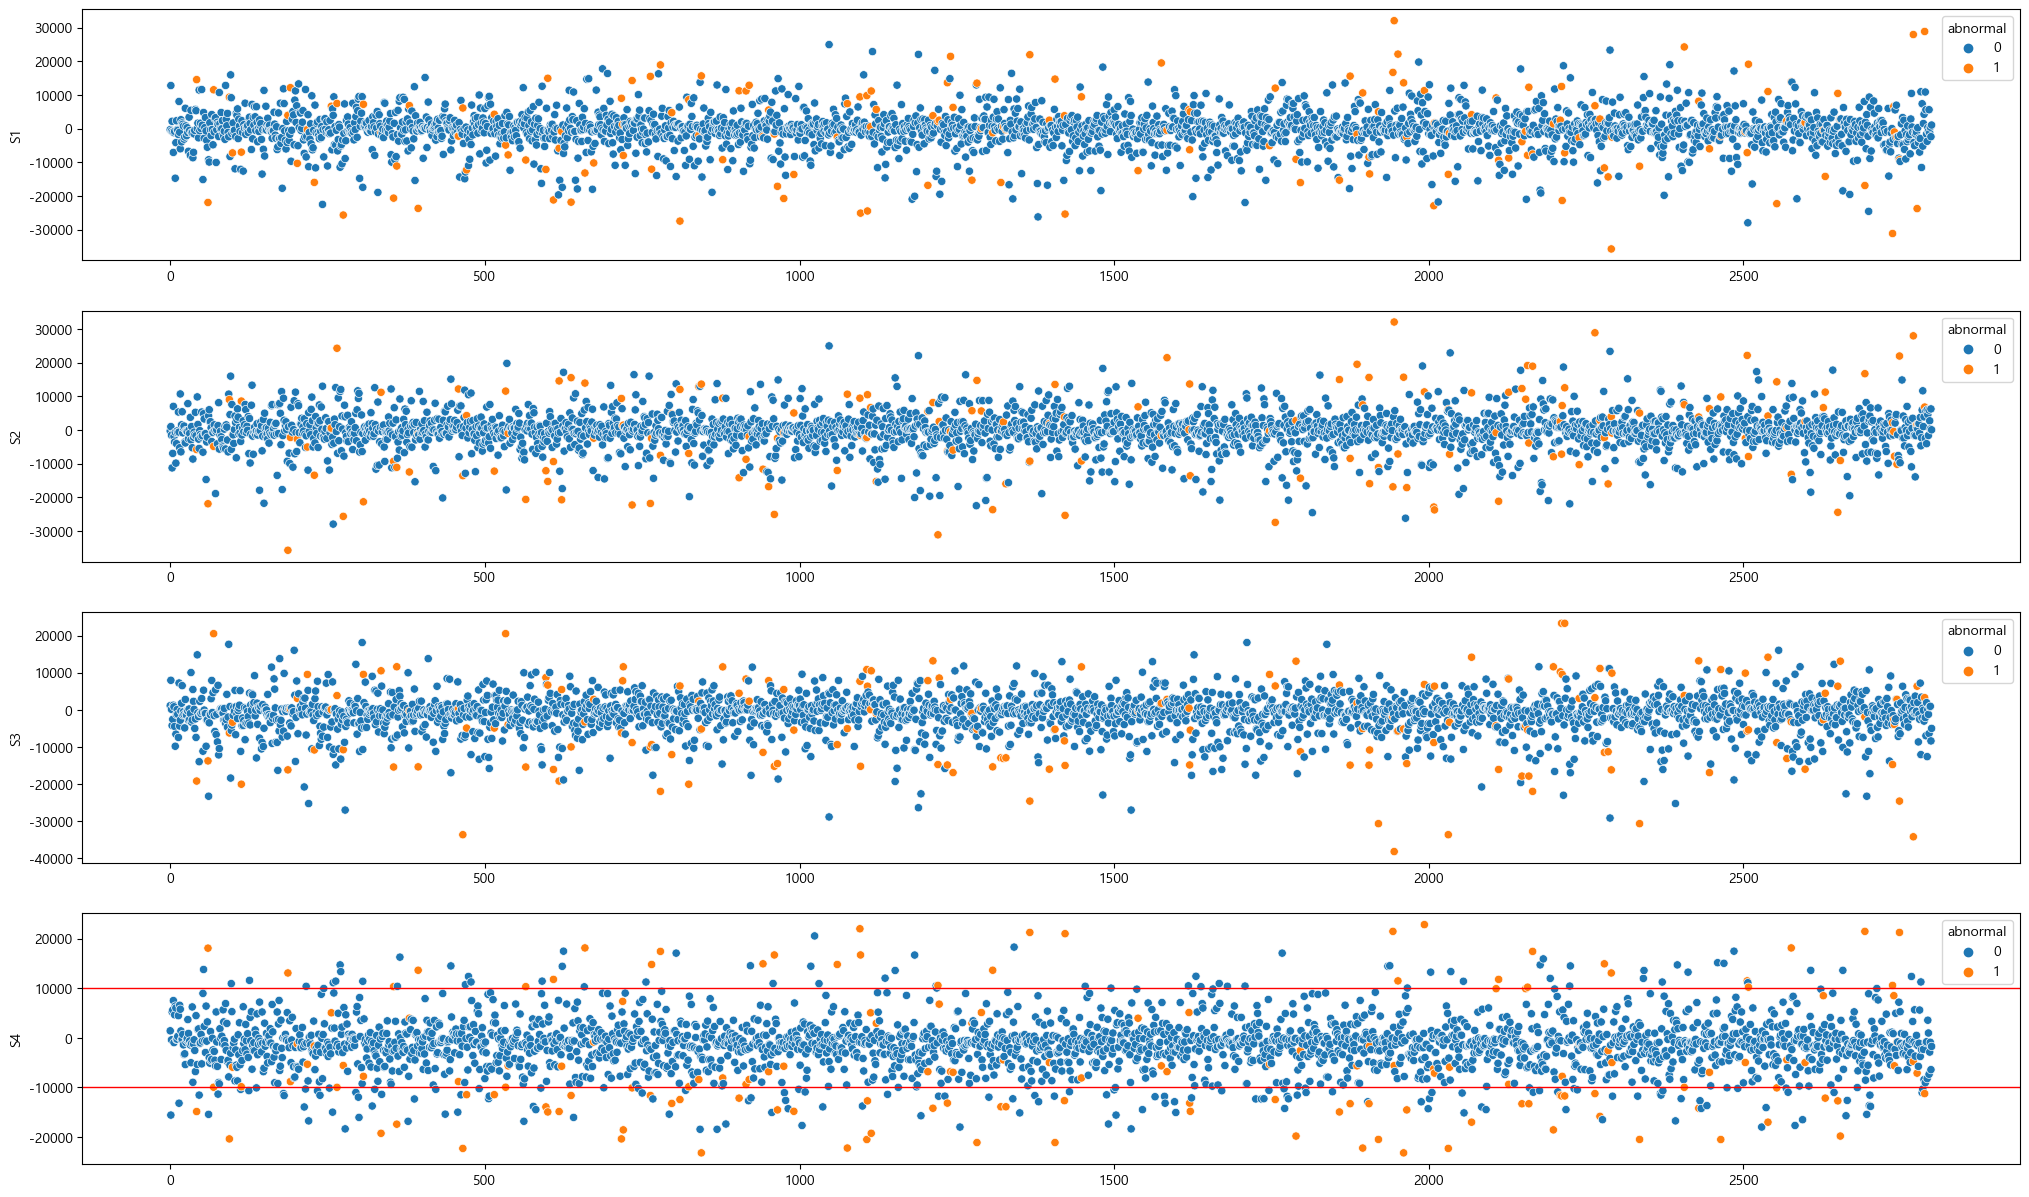

In [28]:
fig, axes = plt.subplots(4, 1)
sns.scatterplot(x=df_merge.index, y=df_merge['S1'], hue = df_merge['abnormal'], ax=axes[0]);
sns.scatterplot(x=df_merge.index, y=df_merge['S2'], hue = df_merge['abnormal'], ax=axes[1]);
sns.scatterplot(x=df_merge.index, y=df_merge['S3'], hue = df_merge['abnormal'], ax=axes[2]);
sns.scatterplot(x=df_merge.index, y=df_merge['S4'], hue = df_merge['abnormal'], ax=axes[3]);
plt.axhline(y=10000, color='r', linewidth=1)
plt.axhline(y=-10000, color='r', linewidth=1)
plt.gcf().set_size_inches(25, 15)

센서값이 평균(mean)에서 멀어질 수록 이상(abnormal)이 더 많이 발생하고 있는 추세임을 알 수 있다  

Scatter plot을 통해 각 센서 값이 10,000 초과 -10,000 미만 일시 더 많은 불량이 발생하는 인사이트를 확인할 수 있다. 실제 평균 이상률(6%) 대비 더 많은 불량이 발생하는지 수치로 확인할 필요가 있다

In [30]:
df_s1 = df_merge[(df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)]
df_s1_abnormal_ratio = (len(df_s1[df_s1['abnormal']==1]) / len(df_s1)) * 100
df_s1_abnormal_ratio

26.978417266187048

S1 불량률을 확인한다

In [31]:
df_s2 = df_merge[(df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)]
df_s2_abnormal_ratio = (len(df_s2[df_s2['abnormal']==1]) / len(df_s2)) * 100
df_s2_abnormal_ratio

26.978417266187048

S2 불량률을 확인한다

In [32]:
df_s3 = df_merge[(df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)]
df_s3_abnormal_ratio = (len(df_s3[df_s3['abnormal']==1]) / len(df_s3)) * 100
df_s3_abnormal_ratio

28.627450980392155

S3 불량률을 확인한다

In [33]:
df_s4 = df_merge[(df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)]
df_s4_abnormal_ratio = (len(df_s4[df_s4['abnormal']==1]) / len(df_s4)) * 100
df_s4_abnormal_ratio

31.333333333333336

S4 불량률을 확인한다

In [35]:
df_merge['rule_base1'] = np.where( ((df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)) , 1, 0)
df_merge['rule_base2'] = np.where( ((df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)) , 1, 0)
df_merge['rule_base3'] = np.where( ((df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)) , 1, 0)
df_merge['rule_base4'] = np.where( ((df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)) , 1, 0)

In [36]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


상위의 인사이트를 활용하여 S1, S2, S3, S4가 10,000 초과, -10,000 미만 일시 이상으로 예측해본다

In [37]:
from sklearn.metrics import classification_report
print(classification_report(df_merge['abnormal'], df_merge['rule_base1']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base2']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base3']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base4']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2640
           1       0.29      0.46      0.35       160

    accuracy                           0.90      2800
   macro avg       0.63      0.69      0.65      2800
weighted avg       0.93      0.90      0.91      2800


              pr

1. precision  

- 예측한 것 중에 실제로 정답인 비율


2. recall  

- 실제 정답 중에서 예측으로 맞춘 비율

- S4 센서를 기준으로 이상을 예측 했을 때가 Best Score(recall 0.59)

## ML 활용 이상진단 및 예측

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df_merge.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_merge['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 4)
(1960,)
(840, 4)
(840,)


In [39]:
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      1.00      1.00       112

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       792
           1       0.76      0.60      0.67        48

    accuracy                           0.97       840
   macro avg       0.87      0.80      0.83       840
weighted avg       0.96      0.97      0.96       840



여기서 train과 test의 값이 차이가 많으므로 과적합이 발생했다고 할 수 있다

In [40]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

rf_clf = RandomForestClassifier(random_state = 2023, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='recall')
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'n_estimators': 500}
최고 예측 정확도: 0.4374


In [41]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state = 2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1848
           1       1.00      0.84      0.91       112

    accuracy                           0.99      1960
   macro avg       1.00      0.92      0.95      1960
weighted avg       0.99      0.99      0.99      1960

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       792
           1       0.76      0.60      0.67        48

    accuracy                           0.97       840
   macro avg       0.87      0.80      0.83       840
weighted avg       0.96      0.97      0.96       840



과적합을 해결하고자 하이퍼 파라미터 튜닝을 활용한다

In [43]:
pd.Series(y_pred_test).value_counts()

0    802
1     38
dtype: int64

1. precision  

- 예측한 것 중에 실제로 정답인 비율


2. recall  

- 실제 정답 중에서 예측으로 맞춘 비율

- RandomForestClassifier로 이상을 예측 했을 때가 Best Score(recall 0.60)

3. support

- 48개 중에 38개가 실제 정답이고, 38개 중에 60%를 예측에 성공했다

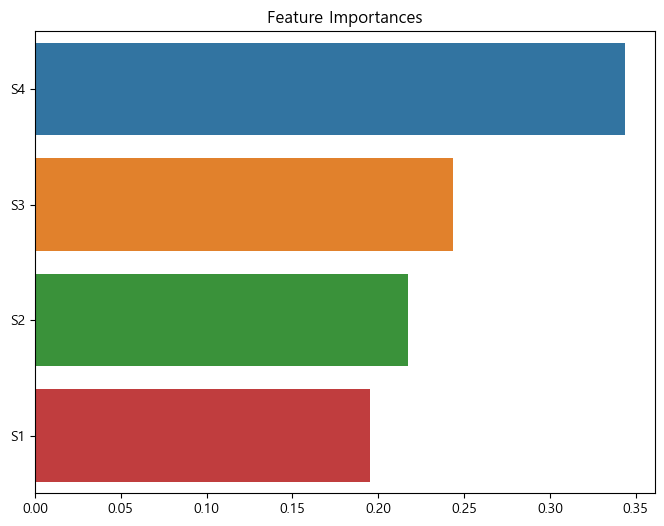

In [44]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, S4가 이상을 예측하는데 가장 중요한 변수임을 확인할 수 있다. 따라서 S4를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

해당 데이터는 모든 변수가 중요성을 띄고 있으므로 하위 변수들을 제거하고 다시 모델링하는 것은 좋지않다

In [46]:
df_new=df_merge.copy()

df_new['S1_2']=df_new['S1']*df_new['S1']
df_new['S2_2']=df_new['S2']*df_new['S2']
df_new['S3_2']=df_new['S3']*df_new['S3']
df_new['S4_2']=df_new['S4']*df_new['S4']

df_new.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4,S1_2,S2_2,S3_2,S4_2
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0,9.505170e+04,9.505170e+04,1.253291e+06,1.989518e+06
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1,1.633329e+08,9.638896e+05,6.325071e+07,2.428846e+08
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0,4.546665e+05,2.482774e+06,1.888707e+04,1.657242e+05
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0,4.683835e+06,1.271195e+08,1.782307e+07,2.747176e+07
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0,9.613422e+05,4.853787e+07,6.531842e+06,3.132564e+07


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df_new.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_new['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 8)
(1960,)
(840, 8)
(840,)


In [48]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      0.96      0.98       112

    accuracy                           1.00      1960
   macro avg       1.00      0.98      0.99      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       792
           1       0.77      0.42      0.54        48

    accuracy                           0.96       840
   macro avg       0.87      0.70      0.76       840
weighted avg       0.95      0.96      0.95       840



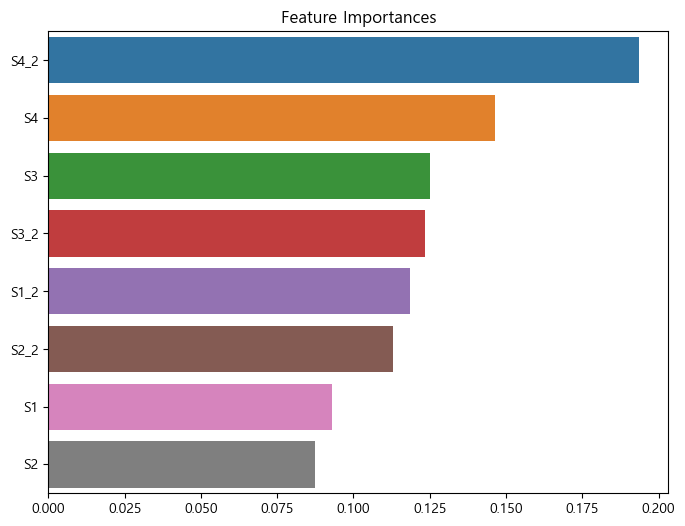

In [49]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

모델의 성능을 향상시키기 위한 새로운 변수를 추가해서 분석한 결과, 이전보다 성능이 낮아졌기 때문에 기존 모델로 예측하는 것이 좋아보인다. Rule base 예측보다 RandomForestClassifier로 예측한 recall값이 높기 때문에 머신러닝을 활용해 예측해야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 이상징후들을 모니터링하고 전/후 제품 생산량, Line stop 횟수를 비교하는 것이다